In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk1-task3-earthquakes.ipynb")

# Task 3: `pandas` fundamentals with earthquake data

## Instructions
- First, update the following cell to have a link to *your* Homework 1 GitHub repository:

**UPDATE THIS LINK:**

https://github.com/silkieMoth/eds220-hwk1

- This task covers topics on the lessons on [subsetting `pandas.DataFrames`](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-3-pandas-subsetting/lesson-3-pandas-subsetting.html) and [plotting](). The best strategy to solve it is to get together with your classmates and work on it together after these lecture.

- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits at moments you think are adequate.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with `otter` import** this is used internally for grading.


## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is given in a single CSV file within the`data` folder (`data/earthquake_data.csv`) and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

<!-- BEGIN QUESTION -->

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it in the `raw_eqk` variable.


In [2]:
import pandas as pd
raw_eqk = pd.read_csv("data/earthquake_data.csv")

<!-- END QUESTION -->

Look at the head of the dataframe. Store the result in the `raw_eqk_head` variable. 

In [3]:
# first five rows of raw_eqk
raw_eqk_head = raw_eqk.head()

In [4]:
# View the dataframe
raw_eqk_head

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe. Store your answer in the `raw_ekq_shape` variable.

In [5]:
# get number of rows and columns in raw_eqk 
raw_ekq_shape = raw_eqk.shape

b. Store the type of `raw_eqk`'s shape in the `raw_eqk_shape_type` variable.

In [6]:
# get the type of the variable produced by using `.shape` on a data frame
raw_eqk_shape_type = type(raw_ekq_shape)

In [7]:
# View the dataframe
raw_eqk_shape_type

tuple

c. Extract *only* the number of rows by accessing it from `raw_eqk`'s shape.Store your answer in the `num_rows` variable.  HINT: how do you index an element in a tuple?

In [8]:
# get number of rows
# accessing the 0th index of the .shape object gives rows in a data frame
num_rows = raw_ekq_shape[0]

## 3

Get the unique values of the type of events. Store your answer in the `unique_events` variable.

In [9]:
# gives array containing every unique value in the `type` columnn raw_eqk
unique_events = raw_eqk["type"].unique()

# 4

a. Select only earthquake events and store them as `eqk` (variable name). Update the index of `eqk` to be the `id` column of the dataframe. 

In [10]:
# subsets raw_eqk for rows that have 'earthquake' in the 'type' column, and method chains `.set_index` to set index to the id column
eqk = raw_eqk[raw_eqk["type"] == 'earthquake'].set_index("id")

In [11]:
# View the dataframe
eqk

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,"29km SW of Valdez, Alaska",earthquake
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,"102km SSE of Old Iliamna, Alaska",earthquake
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,"9km WNW of Cobb, California",earthquake


b. Check the new index by viewing the first 3 rows of `eqk`. Store your results in the `eqk_3` variable. 

In [12]:
# calls `.head()` for eqk with parameter n = 3 so it only displays top 3 rows
eqk_3 = eqk.head(3)

In [13]:
# View the dataframe
eqk_3

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? Store your answer in the `ommitted_events` variable. 

HINT: There are *many* ways you can get this information. One could be to use (2). 

In [14]:
# subtracted total rows in raw dataset from number of rows in earthquake subset to get omitted rows
omitted_events = raw_eqk.shape[0] - eqk.shape[0]

<!-- BEGIN QUESTION -->

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

Text(0.5, 0, 'Magnitude')

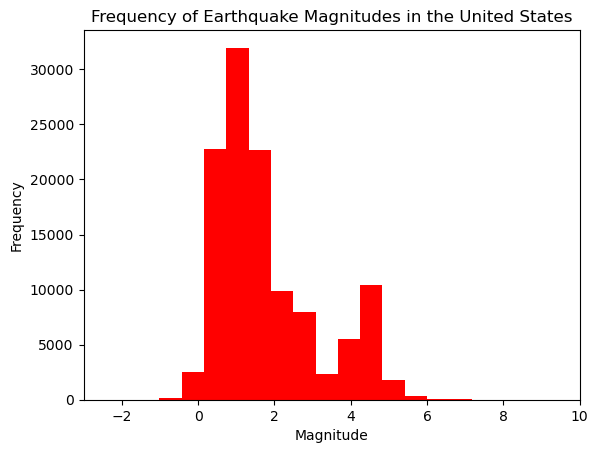

In [15]:
eqk.plot(kind = "hist", # specifies histogram
        column = "mag", # selection of variable to use in x axis
        title = "Frequency of Earthquake Magnitudes in the United States",
        color = "red",
        xlim = [-3,10], # specifies range of x axis, plot defaulted to a range in mass excess of the min and max value of `mag`
        bins = 1500, # specifies number of bins, this number is needed for the plot to accurately represent the frequency of the data
        legend = False).set_xlabel( # removes legend
    "Magnitude") # sets x axis label

<!-- END QUESTION -->

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: check the method [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

In [17]:
# outputs series with 'mag' column, subsets eqk for just the highest 20 values
top20 = eqk["mag"].nlargest(n = 20)

In [19]:
# View the dataframe 
type(top20)

pandas.core.series.Series

<!-- BEGIN QUESTION -->

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

In [ ]:
top20.plot(kind = "bar", # "bar" gives bar graph
          y = "mag", # no x variable argument defaults x to the index
          title = "Top 20 Strongest Earthquakes in the World",
          xlabel = "Location",
          ylabel = "Magnitude",
          color = "darkgoldenrod", # sourced color from matplotlib list of named colors
          legend = False)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

We had set the index to be a unique identifier for each index. In this case, the index fills the role of the x axis when the x argument in `pd.plot()` isn't specified. If we hadn't updated the index, the x axis would just be whatever numbered entry these earthquakes are in the data frame.

<!-- END QUESTION -->

# 8 
We are interested in the place, magnitude, and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame. Store your answer in the `top20_filtered` variable. 

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [ ]:
# gets filtered subset by selecting rows by the index of the `top20` data frame, along with filtering for columns
top20_filtered = eqk.loc[top20.index, ['place', 'mag', 'depth']]

In [ ]:
# View the dataframe
top20_filtered

<!-- BEGIN QUESTION -->

# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


In [ ]:
eqk[eqk["mag"] > 5].plot( # we can plot a subset just by chaining `.plot` to a subset
        kind = "scatter", # scatterplot
        x = "longitude",
        y = "latitude",
        c = "mag", # set magnitude to a color bar
        title = "Global Locations of Earthquakes with Magnitude Greater That 5",
        alpha = 0.5, # about half opacity
        colormap = "inferno", # colormap part of the matplotlib collection, colorblind friendly
        xlabel = "Longitude",
        ylabel = "Latitude")

<!-- END QUESTION -->

